### Dataset - Airlines Data

### Objective:-We want predict Passenger ticket sales

### Importing the important libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Load the dataset and understand it

In [2]:
data=pd.read_excel('E:\\Study\\ASSIGNMENTS\\FORECASTING\\Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### Performing the basic EDA analysis on the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

### performing the basic visualization of the forecasting

In [7]:
data_vis=pd.read_excel('E:\\Study\\ASSIGNMENTS\\FORECASTING\\Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

<AxesSubplot:xlabel='Month'>

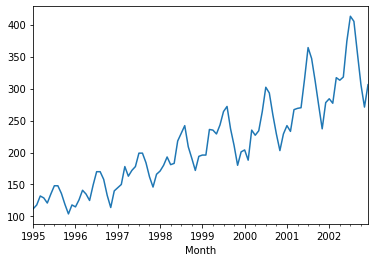

In [8]:
data_vis.plot()

(array([13., 14., 19.,  9., 14., 12.,  9.,  1.,  3.,  2.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <BarContainer object of 10 artists>)

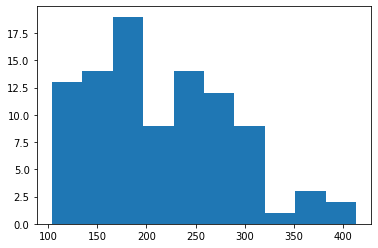

In [9]:

plt.hist(data_vis)

<AxesSubplot:ylabel='Density'>

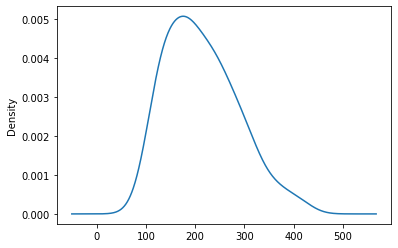

In [10]:

data_vis.plot(kind='kde')

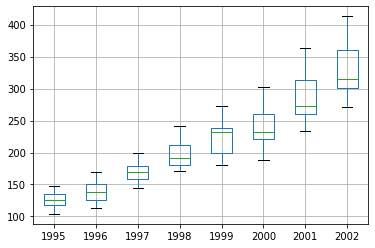

In [11]:
group=data_vis.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot()
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

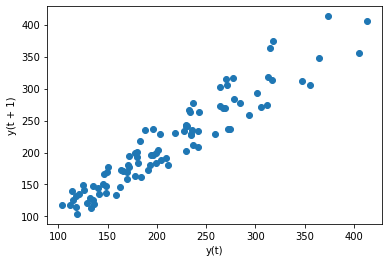

In [12]:
lag_plot(data_vis)

### performing the data driven methods on the dataset

In [13]:

train=data.head(80)# spliting the data into train and test
test=data.tail(16)

### moving average and time decomposition plot

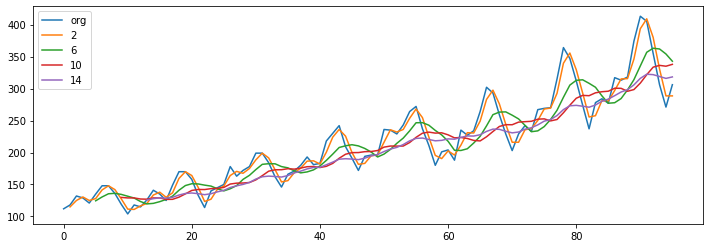

In [14]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label='org')
for i in range(2,18,4):
    data['Passengers'].rolling(i).mean().plot(label=(str(i)))
plt.legend(loc='best')

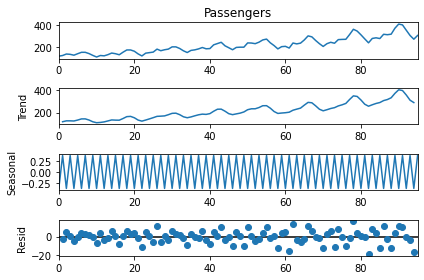

In [15]:
time_plot=seasonal_decompose(data.Passengers,freq=2)
time_plot.plot()
plt.show()

### creating my metric MAPE inorder to find the model performance

In [16]:
def Mape(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

### developing the model of simple exponential

In [17]:
train['Passengers']=train['Passengers'].astype('double')
sem_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)

In [18]:
pred_sem=sem_model.predict(start=test.index[0],end=test.index[-1])
pred_sem

80    297.434175
81    297.434175
82    297.434175
83    297.434175
84    297.434175
85    297.434175
86    297.434175
87    297.434175
88    297.434175
89    297.434175
90    297.434175
91    297.434175
92    297.434175
93    297.434175
94    297.434175
95    297.434175
dtype: float64

In [19]:
sem_mape=Mape(pred_sem,test.Passengers)
sem_mape

11.375850554268276

### developing the holt method

In [20]:
holt_method=Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)

In [21]:

holt_pred=holt_method.predict(start=test.index[0],end=test.index[-1])
holt_pred

80    366.386458
81    380.542978
82    394.699497
83    408.856016
84    423.012535
85    437.169055
86    451.325574
87    465.482093
88    479.638612
89    493.795132
90    507.951651
91    522.108170
92    536.264689
93    550.421208
94    564.577728
95    578.734247
dtype: float64

In [22]:
holt_mape=Mape(holt_pred,test.Passengers)
holt_mape

51.9344398436302

### holt winter exponential smoothing with additive seasonality and additive trend

In [23]:
holt_win_model = ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()

In [24]:
holt_win_model_pred=holt_win_model.predict(start=test.index[0],end=test.index[-1])
holt_win_model_pred

80    325.215513
81    302.215423
82    281.215388
83    302.715346
84    306.813522
85    307.670810
86    334.956643
87    328.813924
88    328.099637
89    352.099669
90    377.099577
91    376.242380
92    352.987389
93    329.987299
94    308.987264
95    330.487222
dtype: float64

In [25]:
holt_win_model_mape=Mape(holt_win_model_pred,test['Passengers'])
holt_win_model_mape

7.947065050023661

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [26]:
holt_win_model2 = ExponentialSmoothing(train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [27]:
holt_win_model2_pred=holt_win_model2.predict(start=test.index[0],end=test.index[-1])
holt_win_model2_pred

80    310.167468
81    273.378279
82    239.338290
83    270.781932
84    276.720500
85    274.058000
86    317.641288
87    307.796417
88    306.485055
89    343.879735
90    384.064928
91    379.426879
92    336.660358
93    296.563795
94    259.494382
95    293.427155
dtype: float64

In [ ]:
holt_win_model2_mape=Mape(holt_win_model2_pred,test['Passengers'])
holt_win_model2_mape

### from the above model we are using the holts winter exponential smoothing with multiplicative seasonality and additive trend because it has given the lowest value of the Mape and applying on the entire data set

In [ ]:
data['Passengers']=data['Passengers'].astype('double')

In [ ]:
model=ExponentialSmoothing(data['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [ ]:
model.forecast(5)